# House Pricing(Regression)

# import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import skew
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

 # Load and Explore the Dataset link 
https://www.kaggle.com/datasets/prokshitha/home-value-insights

In [2]:
df = pd.read_csv("house_price_regression_dataset.csv")
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [3]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


# Data Preprocessing

In [5]:
df.shape

(1000, 8)

In [6]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns.values

array(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype=object)

## handle the year_build

In [9]:
from datetime import datetime
currentdate = datetime.now()
current_year = currentdate.year
current_year


2024

In [10]:
df["Year_Built"] =current_year-df["Year_Built"] 

In [ ]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,43,0.599637,0,5,2.623829e+05
1,4272,3,3,8,4.753014,1,6,9.852609e+05
2,3592,1,2,8,3.634823,0,9,7.779774e+05
3,966,1,2,47,2.730667,1,8,2.296989e+05
4,4926,2,1,31,4.699073,0,8,1.041741e+06


## handle the outlier

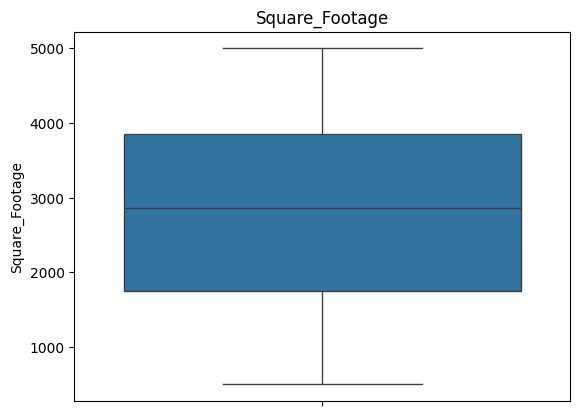

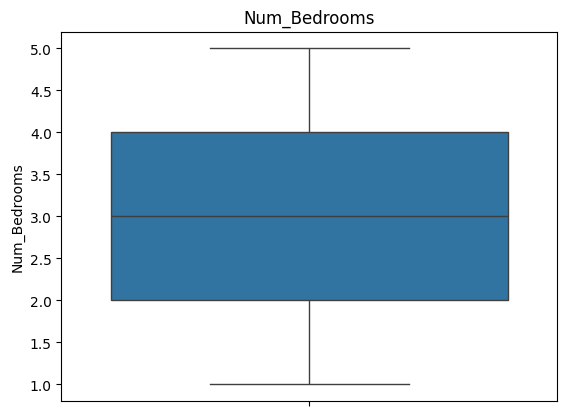

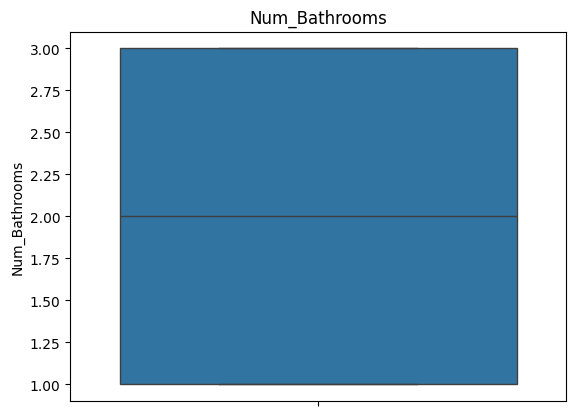

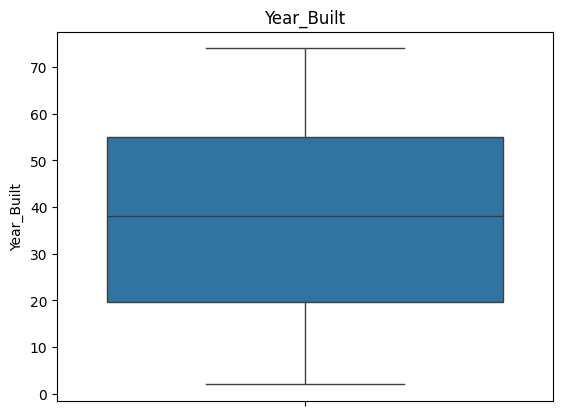

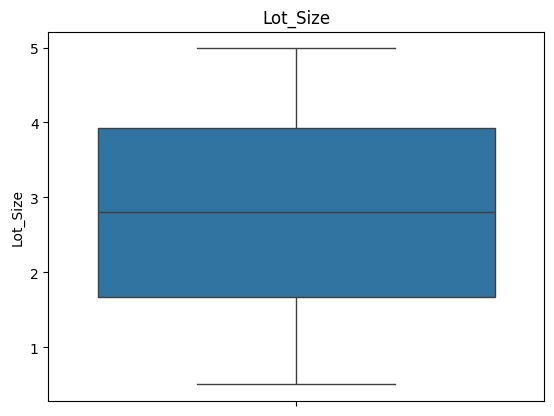

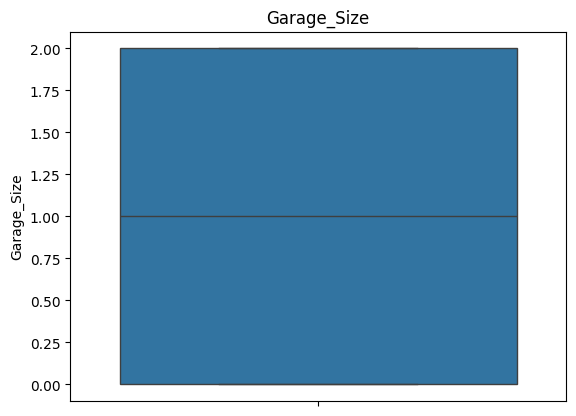

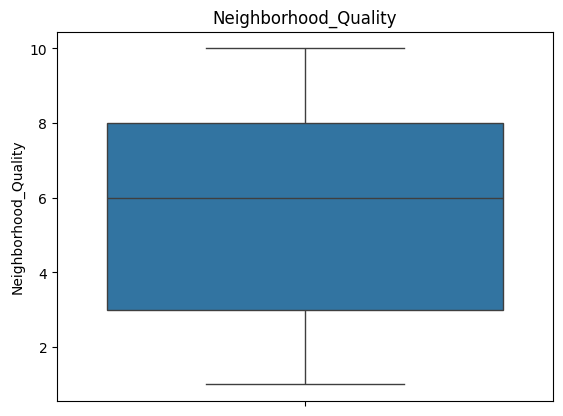

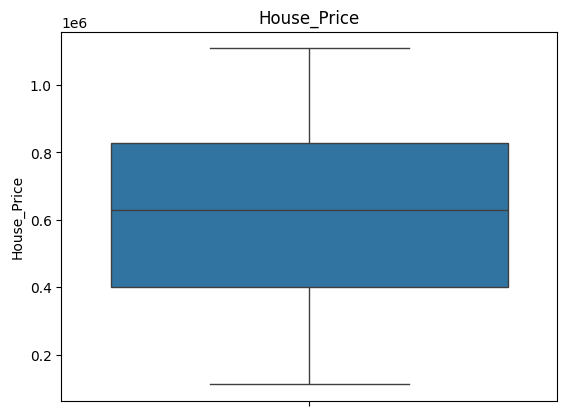

In [12]:
for i in df.columns.values:
    sns.boxplot(y=df[i])  
    plt.title(i)  
    plt.show()

# Visualize the data

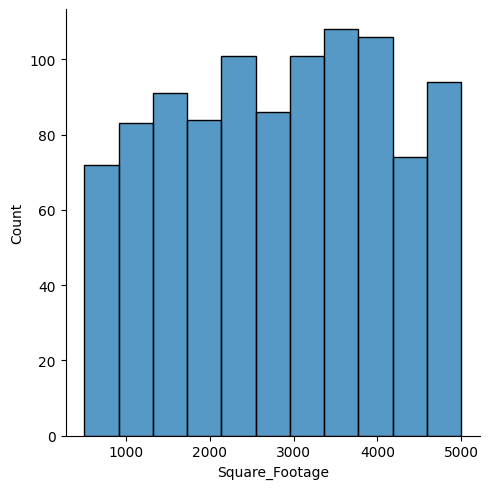

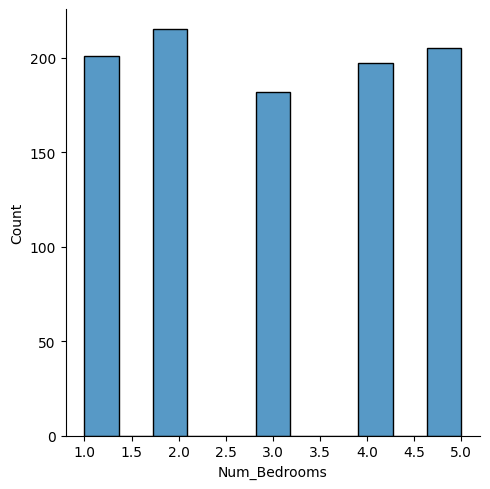

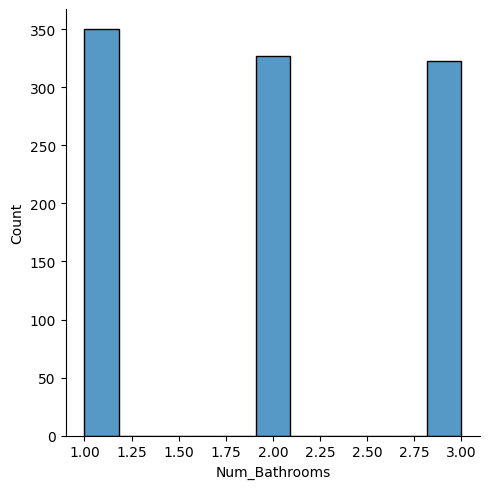

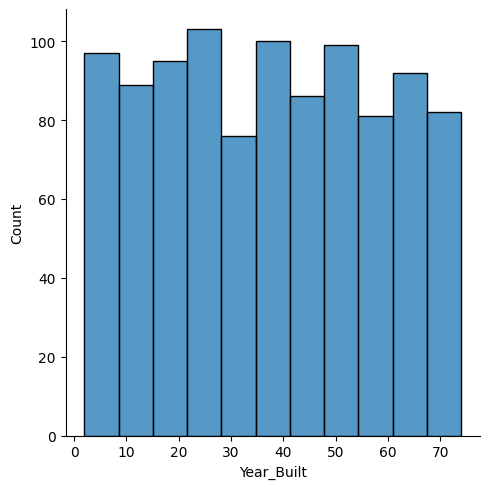

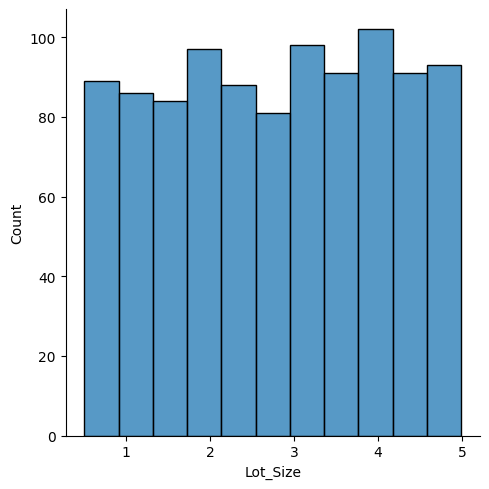

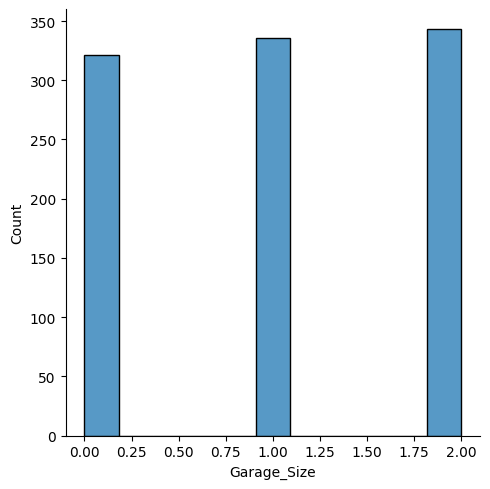

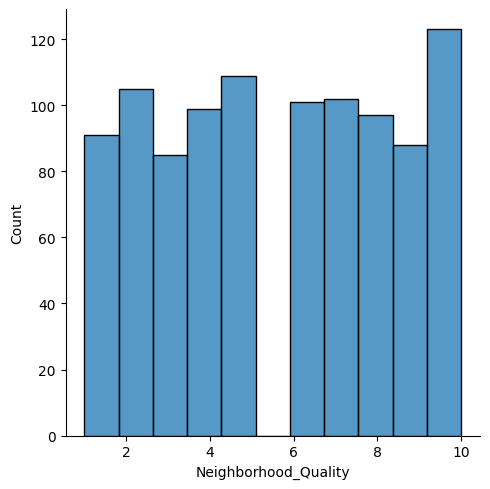

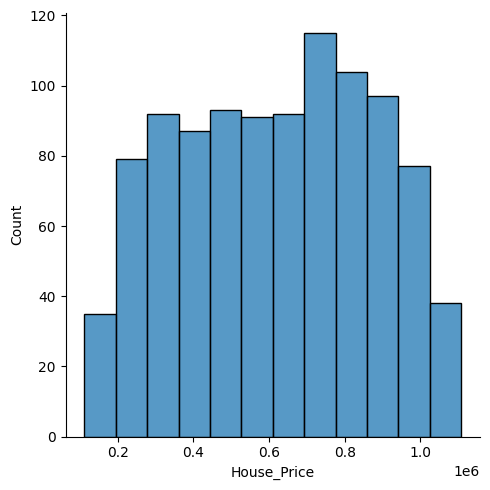

In [13]:
for col in df:
  sns.displot(df[col])
  plt.show()

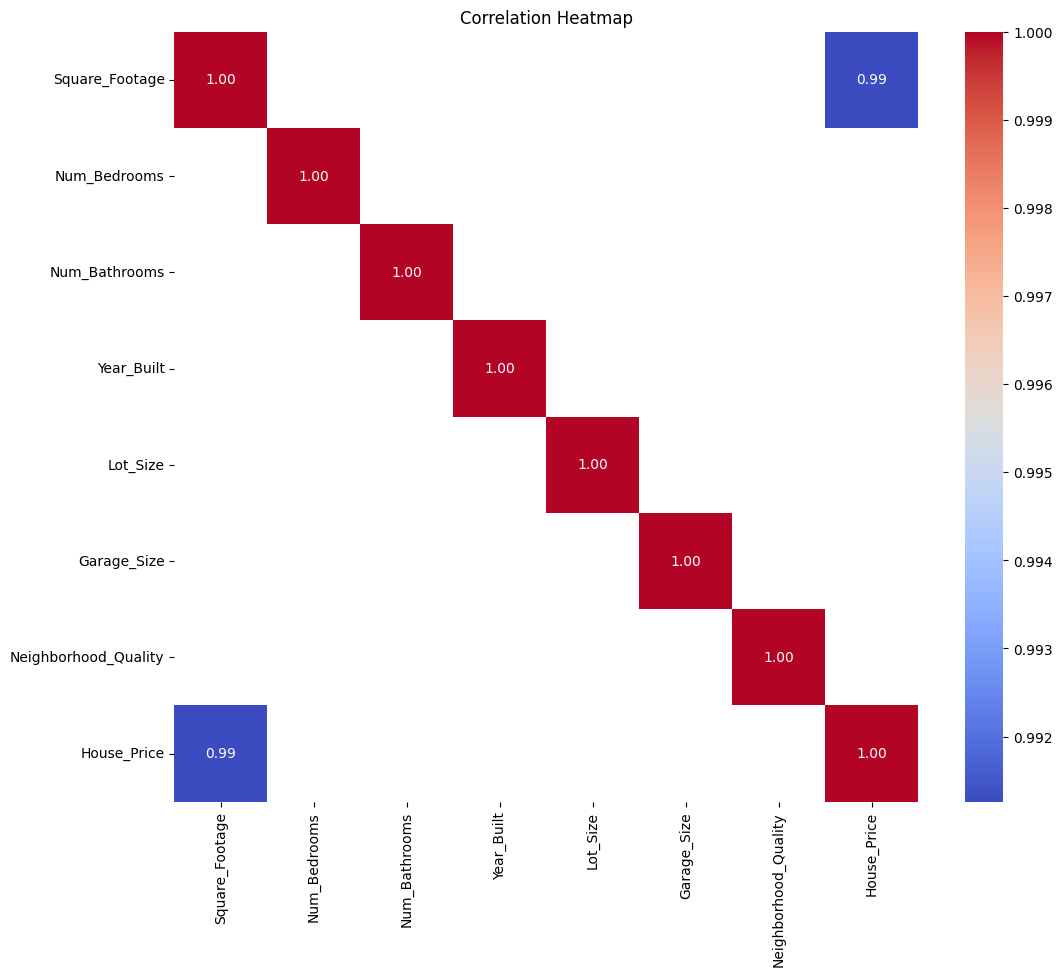

In [14]:
corr_data = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt='.2f',mask=corr_data<.3)
plt.title('Correlation Heatmap')
plt.show()

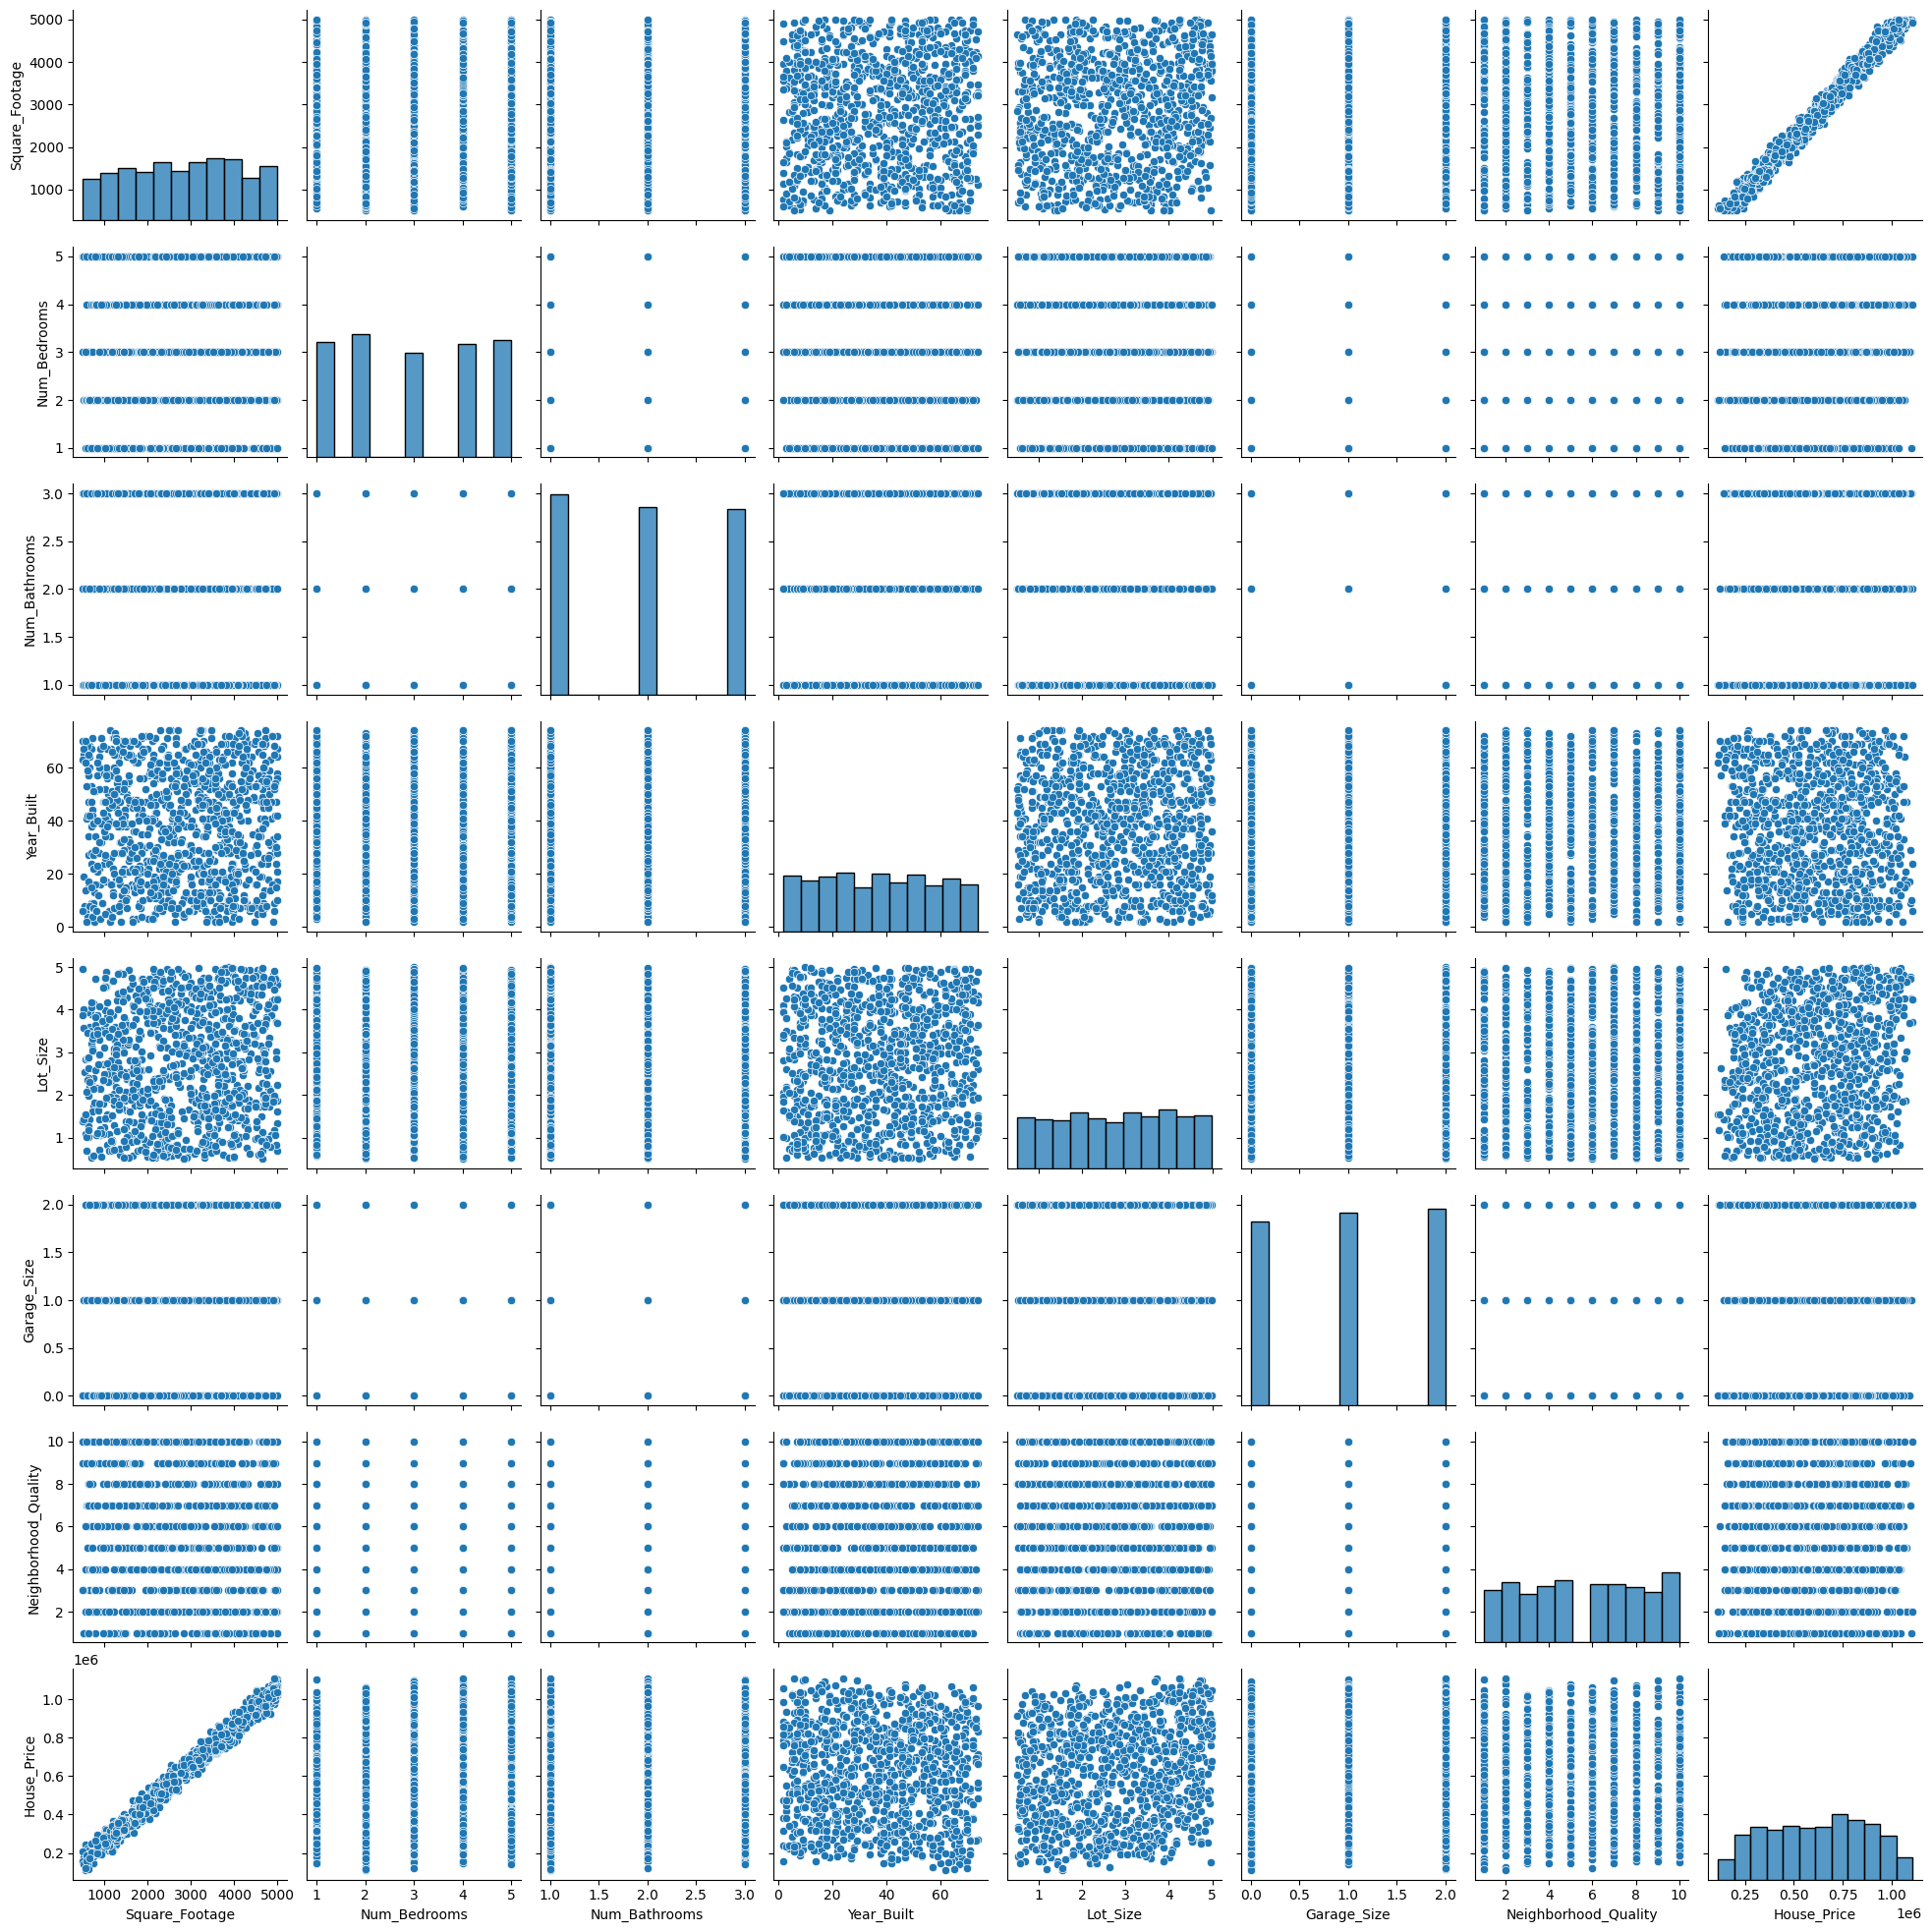

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
abs(df.corr()["House_Price"]).sort_values(ascending=False)

House_Price             1.000000
Square_Footage          0.991261
Lot_Size                0.160412
Garage_Size             0.052133
Year_Built              0.051967
Num_Bedrooms            0.014633
Neighborhood_Quality    0.007770
Num_Bathrooms           0.001862
Name: House_Price, dtype: float64

## scalling the data

# Standard Scaling (Standardization)

Standard scaling (also known as **standardization**) is the process of transforming the data so that it has a **mean of 0** and a **standard deviation of 1**. This is useful when the features have different units or scales, and we want them to contribute equally to machine learning algorithms that rely on distance or gradient-based optimization.

## Formula for Standard Scaling
Given a feature \( X \), the standardization (or z-score) of each data point \( X_i \) is calculated as:

$$
X_{\text{scaled}} = \frac{X_i - \mu}{\sigma}
$$

Where:
- \( X_{\text{scaled}} \): The scaled (standardized) value of the feature.
- \( X_i \): The original value of the feature.
- \( \mu \): The mean (average) of the feature values.
- \( \sigma \): The standard deviation of the feature values.

### Steps for Standard Scaling
1. **Compute the Mean** (\( \mu \)) of the feature \( X \):
   $$
   \mu = \frac{1}{n} \sum_{i=1}^{n} X_i
   $$
   Where \( n \) is the number of data points.

2. **Compute the Standard Deviation** (\( \sigma \)) of the feature \( X \):
   $$
   \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (X_i - \mu)^2}
   $$

3. **Transform the Data** using the formula:
   $$
   X_{\text{scaled}} = \frac{X_i - \mu}{\sigma}
   $$

The result is that the scaled feature will have:
- A **mean** of 0.
- A **standard deviation** of 1.


In [17]:
x=df.drop('House_Price',axis=1)
y=df['House_Price']

In [18]:
def standard_scale(X):
    mean_X = np.mean(X)
    
    std_X = np.std(X)
    
    X_scaled = (X - mean_X) / std_X
    
    return X_scaled


In [19]:
x_scaled = standard_scale(x)

c:\Users\mahmo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


# check the coorelation between the columns

# Train & test your models

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


# Build the Regression Model

# Implemtation Multiple Linear Regression

## General Equation
$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$

Where:
- $y$: The predicted dependent variable (output).
- $\beta_0$: The intercept (bias term).
- $\beta_1, \beta_2, \dots, \beta_n$: The coefficients (weights) for the independent variables $x_1, x_2, \dots, x_n$.
- $x_1, x_2, \dots, x_n$: The independent variables (features).

---

## Matrix Form
$
y = X \cdot \beta
$

Where:
- $X$: The **feature matrix** of shape $m \times (n+1)$, where:
  $
  X = \begin{bmatrix}
  1 & x_{11} & x_{12} & \cdots & x_{1n} \\
  1 & x_{21} & x_{22} & \cdots & x_{2n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  1 & x_{m1} & x_{m2} & \cdots & x_{mn}
  \end{bmatrix}
  $

- $\beta$: The **parameter vector**:
  $
  \beta = \begin{bmatrix}
  \beta_0 \\
  \beta_1 \\
  \beta_2 \\
  \vdots \\
  \beta_n
  \end{bmatrix}
  $

- $y$: The predicted output vector:
  $
  y = \begin{bmatrix}
  \hat{y}_1 \\
  \hat{y}_2 \\
  \vdots \\
  \hat{y}_m
  \end{bmatrix}
  $

---

## Normal Equation for $\beta$
The parameters ($\beta$) in multiple linear regression are computed as:
$
\beta = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$

Where:
- $X^T$: Transpose of the feature matrix $X$.
- $(X^T \cdot X)^{-1}$: Inverse of the matrix $X^T \cdot X$.
- $y$: The actual output vector (dependent variable).

---

## Prediction Formula
Once the parameters are determined, the predictions ($\hat{y}$) are computed as:
$
\hat{y} = X \cdot \beta
$


In [21]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.intercept = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X] 
        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        
        self.intercept = theta[0]
        self.weights = theta[1:]

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept term
        return X_b.dot(np.concatenate(([self.intercept], self.weights)))

In [22]:
##fit the model
model = LinearRegression()
model.fit(x_train,y_train.values)

# Predict the output of new values

In [23]:
y_pred=model.predict(x_test)
y_pred

array([ 868687.10750096,  490337.8982748 ,  945667.12425233,
       1033402.8760162 ,  776698.77391269,  732444.09336007,
        995051.99158983,  885174.76928469,  796730.53817629,
        931741.09213848,  759486.73379524,  645409.40410497,
        217706.20693049, 1047436.52674656,  536985.28375021,
        187868.55343749,  456819.02346921,  357933.9850003 ,
        743138.35724336,  362670.94799844,  775101.05251245,
        478174.4292164 ,  680966.06348777,  889457.56006625,
        447158.93388137,  396997.78644852,  454334.22027595,
        442837.53545836,  187336.81097389,  491668.18075853,
        279715.81745954,  895941.00060588,  783583.19783748,
        352212.91738799,  479313.28468333,  766612.66015501,
        474636.25111078,  572446.37290956,  303449.7062437 ,
        154599.27036381,  304341.0509525 ,  299677.00780279,
        508575.91106953,  309977.5172595 , 1082131.76995591,
       1011343.63578379,  760359.56461317,  807425.57450236,
       1025548.17012373,

# visualizes for LinearRegressionModel the dataset after performing the model (predicted results VS. actual results). 

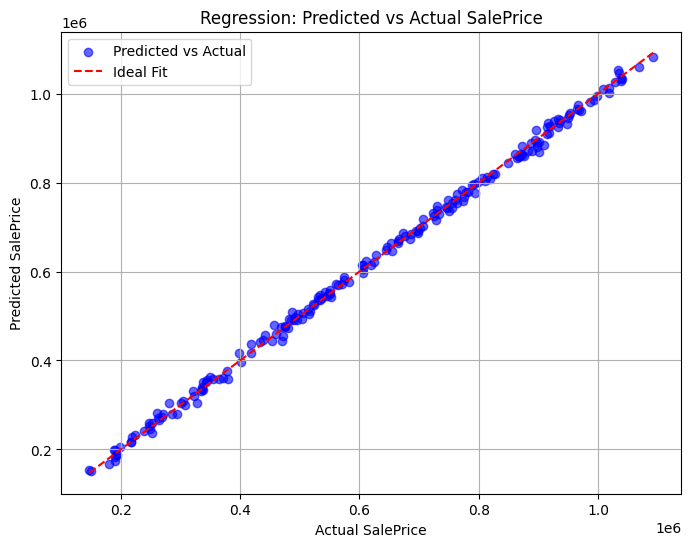

In [24]:
# Scatter plot for predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Regression: Predicted vs Actual SalePrice")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate regression model

### Mean Squared Error (MSE):

$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$

Where:
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value
- $n$ is the number of data points

### Root Mean Squared Error (RMSE):

$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$

Where:
- $MSE$ is the Mean Squared Error


In [25]:
def mse(y_predict, y_true):
    if len(y_predict) != len(y_true):
        print("The length of predicted values does not equal the length of true values")
    else:
        return np.sum(np.power(y_true - y_predict, 2)) / len(y_predict)

In [26]:
def rmse(y_predict, y_true):
    if len(y_predict) != len(y_true):
        print("The length of predicted values does not equal the length of true values")
    else:
        return np.sqrt(mse(y_predict, y_true))

In [27]:
def mae(y_predict, y_pred):
    absolute_errors = np.abs(y_predict - y_pred)
    mae = np.mean(absolute_errors)
    return mae

In [28]:
# Evaluate regression model
rmse = rmse(y_test, y_pred)
mse = mse(y_test, y_pred)
mae = mae(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [29]:
print("for LinearRegressionModel Evaluation:")
print(f"RMSE: {rmse:.5f}, MAE: {mae:.5f}, MSE: {mse:.5f}, R2: {r2:.5f}")

for LinearRegressionModel Evaluation:
RMSE: 10071.48442, MAE: 8174.58360, MSE: 101434798.51168, R2: 0.99843


In [30]:
model_1_metrics = {
    "RMSE": rmse,
    "MAE": mae,
    "MSE": mse,
    "R²": r2
}


## Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=150,random_state=42 , max_depth=5 )


In [32]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=150, random_state=42)

# predict the data the random forest model

In [33]:
y_pred=rf_model.predict(x_test)
y_pred

array([ 847851.93608242,  514483.70540322,  956481.69815495,
       1044991.65887154,  792949.75803237,  748596.16693421,
        981165.44811721,  871392.63278595,  822905.29879416,
        915787.73740185,  756722.87021369,  662548.93189901,
        238438.20823123, 1044919.6280973 ,  558042.4760973 ,
        233820.91752259,  490040.39820966,  403561.62477738,
        722867.23931645,  349243.8029635 ,  758865.58438082,
        507538.86259942,  715030.69515211,  879595.33227735,
        433125.58192581,  358799.87001139,  451859.12943205,
        442190.4872251 ,  236522.24340533,  452654.07830514,
        253425.62431152,  895897.35820273,  750857.27920168,
        343441.63823001,  495182.64427177,  756558.67211745,
        470861.4866374 ,  596539.87685334,  254788.47508011,
        164401.69619037,  317955.02066753,  262234.84454707,
        508654.16856677,  312277.6001761 , 1070010.43129861,
        963671.50335841,  788202.11494745,  821136.38174962,
        990999.0559339 ,

# visulaization the model

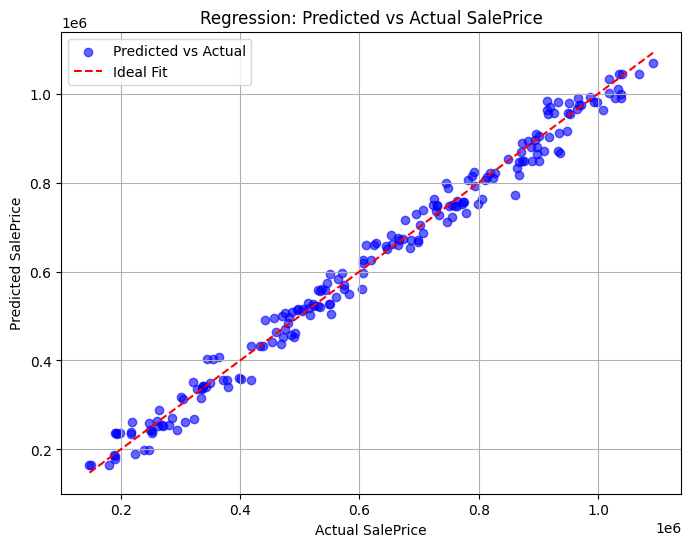

In [34]:
# Scatter plot for predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Regression: Predicted vs Actual SalePrice")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate regression model

In [35]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [36]:
print("Regression Evaluation:")
print(f"RMSE: {rmse:.5f}, MAE: {mae:.5f}, R2: {r2:.5f}")

Regression Evaluation:
RMSE: 28412.66768, MAE: 22834.33305, R2: 0.98748


In [37]:
model_2_metrics = {
    "RMSE": rmse,
    "MAE": mae,
    "MSE": mse,
    "R²": r2
}


## compare the two model

In [38]:
def compare_models(model_1_metrics, model_2_metrics):
    metrics = ["RMSE", "MAE", "MSE", "R²"]
    
    conclusions = []
    for metric in metrics:
        if model_1_metrics[metric] < model_2_metrics[metric]:
            conclusions.append(f"Model 1 has lower {metric}, better performance.")
        elif model_1_metrics[metric] > model_2_metrics[metric]:
            conclusions.append(f"Model 2 has lower {metric}, better performance.")
        else:
            conclusions.append(f"Both models have the same {metric}.")
    
    comparison_df = pd.DataFrame({
        "Metric": metrics,
        "Model 1": [model_1_metrics[metric] for metric in metrics],
        "Model 2": [model_2_metrics[metric] for metric in metrics],
        "Conclusion": conclusions
    })
    
    return comparison_df

In [39]:
compare_models(model_1_metrics, model_2_metrics)

,Metric,Model 1,Model 2,Conclusion
0,RMSE,1.007148e+04,2.841267e+04,"Model 1 has lower RMSE, better performance."
1,MAE,8.174584e+03,2.283433e+04,"Model 1 has lower MAE, better performance."
2,MSE,1.014348e+08,8.072797e+08,"Model 1 has lower MSE, better performance."
3,R²,9.984264e-01,9.874760e-01,"Model 2 has lower R², better performance."


from these summary table we saw that is the multy linear model is prefect for these data set then the random forest

In [40]:
acc = pd.DataFrame()
acc["Actual"] = y_test
acc["Predicted"] = y_pred
acc.reset_index(drop=True)

,Actual,Predicted
0,9.010005e+05,8.478519e+05
1,4.945375e+05,5.144837e+05
2,9.494042e+05,9.564817e+05
3,1.040389e+06,1.044992e+06
4,7.940100e+05,7.929498e+05
...,...,...
195,8.245296e+05,8.101532e+05
196,1.803936e+05,1.658890e+05
197,9.658167e+05,9.891278e+05
198,4.336642e+05,4.335222e+05


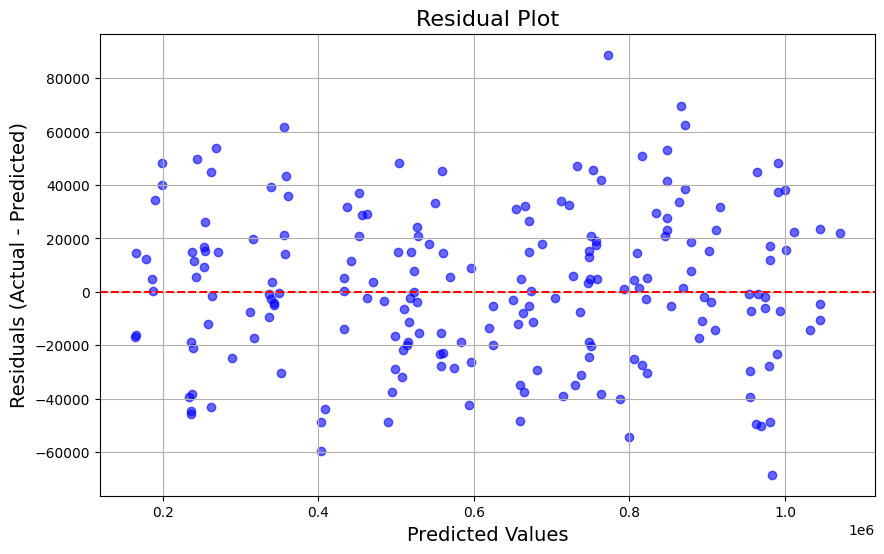

In [41]:
residuals = y_test - y_pred

# Scatter plot for residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=14)
plt.grid(True)
plt.show()